In [1]:
import tensorflow as tf

/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/skipper/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.mnist

In [5]:
type(mnist)

tensorflow.python.util.deprecation_wrapper.DeprecationWrapper

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [7]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
X_test.shape

(10000, 28, 28)

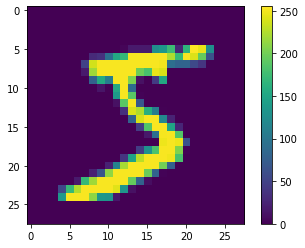

In [11]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [12]:
X_train = X_train/255
X_test = X_test/255

<h1>Build Model</h1>

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [14]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs = 10,batch_size=10,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 21s 431us/sample - loss: 0.2275 - acc: 0.9309 - val_loss: 0.1524 - val_acc: 0.9532
Epoch 2/10
48000/48000 [==============================] - 21s 444us/sample - loss: 0.1057 - acc: 0.9686 - val_loss: 0.1143 - val_acc: 0.9646
Epoch 3/10
48000/48000 [==============================] - 23s 482us/sample - loss: 0.0764 - acc: 0.9769 - val_loss: 0.1043 - val_acc: 0.9705
Epoch 4/10
48000/48000 [==============================] - 22s 461us/sample - loss: 0.0622 - acc: 0.9809 - val_loss: 0.0937 - val_acc: 0.9755
Epoch 5/10
48000/48000 [==============================] - 21s 443us/sample - loss: 0.0500 - acc: 0.9840 - val_loss: 0.1066 - val_acc: 0.9742
Epoch 6/10
48000/48000 [==============================] - 22s 468us/sample - loss: 0.0426 - acc: 0.9870 - val_loss: 0.0952 - val_acc: 0.9768
Epoch 7/10
48000/48000 [==============================] - 23s 470us/sample - loss: 0.0391 - acc: 0.9887 

In [18]:
test_loss,test_acc = model.evaluate(X_test,y_test)
print(test_loss,test_acc)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.1180 - acc: 0.9777
0.1179539976955235 0.9777


In [19]:
pred = model.predict_classes(X_test)

In [20]:
pred

array([7, 2, 1, ..., 4, 5, 6])

<h1>Plotting Learning Curve And Confusion Matrix</h1>

In [21]:
history

In [22]:
history.history

{'loss': [0.22749537276035578,
  0.10574134514851191,
  0.07639952276155915,
  0.06223543350937045,
  0.049951621217869634,
  0.042585245087424214,
  0.03911328318932055,
  0.03360659331003111,
  0.030320821538366186,
  0.03027868106021591],
 'acc': [0.93091667,
  0.9686458,
  0.97685415,
  0.9809167,
  0.9840417,
  0.987,
  0.98875,
  0.98933333,
  0.9910833,
  0.990625],
 'val_loss': [0.15241475698152498,
  0.11432649295512419,
  0.10432332065664052,
  0.09370534700050712,
  0.1065713128753869,
  0.09515889532296444,
  0.1086366225794077,
  0.12196452604786497,
  0.13267338388734667,
  0.11902876676355943],
 'val_acc': [0.95316666,
  0.96458334,
  0.9705,
  0.9755,
  0.9741667,
  0.97675,
  0.9775,
  0.97541666,
  0.97475,
  0.97716665]}

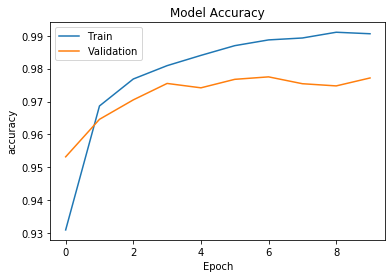

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

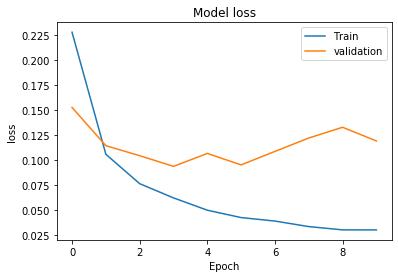

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','validation'],loc = 'upper right')
plt.show()

In [25]:
from mlxtend.plotting import plot_confusion_matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
mat = confusion_matrix(y_test,pred)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8db3d8cbe0>)

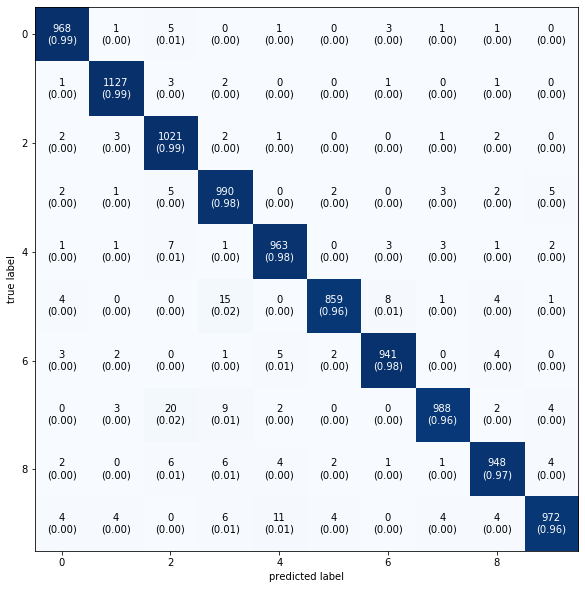

In [28]:
plot_confusion_matrix(conf_mat = mat,figsize = (10,10),show_normed=True)

6 5
6 5
6 5
6 5


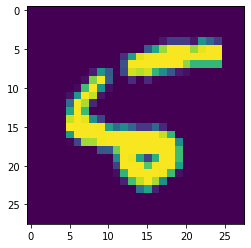

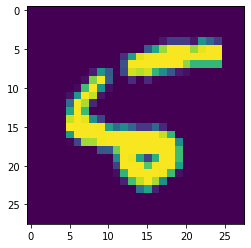

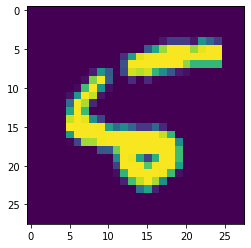

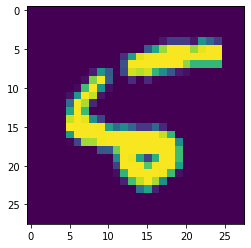

In [32]:
k = 0
i = 0
while(i<10):
    if (pred[k] != y_test[k]):
        plt.figure()
        plt.imshow(X_test[k])
        print(pred[k],y_test[k])
        break
    k+=1